# Data Preprocessing (Feature Scaling/ Selection/ Regularization)

http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.php



### Import toy Data

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np

wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                   header = None)
wine.columns = ['Class Label','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
wine.head()

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Train Test Split

In [2]:
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:,1:], wine.iloc[:,0]

#the train test split command
X_train, X_test, y_train, y_test = train_test_split(X, y)


## Feature Scaling (Standardization)
    Subtract the mean &  divide by the standard deviance.

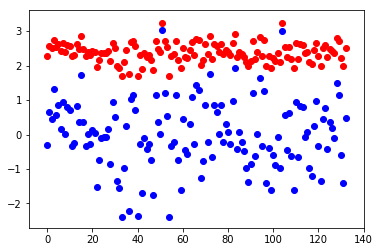

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std =  sc.transform(X_test)

xx = np.arange(len(X_train))
plt.scatter(xx, X_train_std[:,2], color = 'b')
plt.scatter(xx, X_train.iloc[:,2], color = 'red')

### Importance of Feature Scaling

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

.rescale the features so that they have the properties of a standard normal distribution with a mean of zero and st dev of 1. THE Main goal of standardizing features is to help convergence of the technique used for optimization

PCA: we are interested in the components that maximize variance, and this can be muddled by differences in scaling of seperate features. IF PCA is not staandardized before fit, it is incorrect.


### When to Standardize: It usually doesnt hurt...
https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia



#### Linear Regression  - Standardization is not needed

You do not need to center or standardize dataa in multiple regression. Difference in magnitude of explanatory variables is accounted for by the estimated betas. Scale and location of explanatory variables does not affect the validity of a linear model in any way.

"As @gung alludes to and @MånsT shows explicitly (+1 to both, btw), centering/scaling does not effect your statistical inference in regression models - the estimates are adjusted appropriately and the p-values will be the same."

#### Other Algorithms - Algs that exploit distance or similarity need scaling to converge quicker

https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm

http://www.dataschool.io/comparing-supervised-learning-algorithms/

KNN, SVM -- good idea to standardize

Neural Networks - Need to be standardized

Naive Bayes, Decision Trees, Tree ensembles -- invariant to feature scaling, but it doesnt hurt

## Feature Selection

Choose a simpler model with fewer parameters.
Introduce a penalty for complexity via regularization.
Reduce the dimensionality of the data.
Collect more training data. This may not be applicable.


### L1 Regularization

can be used as a method of feature selection, since irrelevant models are pushed to a zero weight.
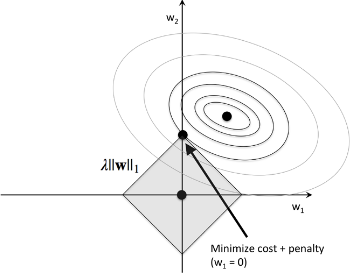
